# Data Understanding and Preprocessing

## Importing Dataset

Dataset from: https://d2l.udst.edu.qa/d2l/login?sessionExpired=0&target=%2fd2l%2fle%2fcontent%2f136863%2fviewContent%2f3130847%2fView

In [3]:
'''
=========================================================================================
UJIIndoorLoc Dataset:
=========================================================================================
The UJIIndoorLoc is a Multi-Building Multi-Floor indoor localization database to test Indoor Positioning System that rely on WLAN/WiFi fingerprint

J. Torres-Sospedra, R. Montoliu, A. Martnez-Us, T. Arnau, and J. Avariento. "UJIIndoorLoc," UCI Machine Learning Repository, 2014. [Online]. Available: https://doi.org/10.24432/C5MS59.

Attribute 001 (WAP001): Intensity value for WAP001. Negative integer values from -104 to 0 and +100 (closer to 0 mean closer) Positive value 100 used if WAP001 was not detected.
....WAP002...WAP003... to WAP00520
Attribute 520 (WAP520): Intensity value for WAP520. Negative integer values from -104 to 0 and +100. Positive Vvalue 100 used if WAP520 was not detected.
Attribute 521 (LONGITUDE): Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000
Attribute 522 (LATITUDE): Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.
Attribute 523 (FLOOR): Altitude in floors inside the building. Integer values from 0 to 4.
Attribute 524 (BUILDINGID): ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.
Attribute 525 (SPACEID): Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.
Attribute 526 (RELATIVEPOSITION): Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values. 
Attribute 527 (USERID): User identifier (see below). Categorical integer values. 
Attribute 528 (PHONEID): Android device identifier (see below). Categorical integer values.  
Attribute 529 (TIMESTAMP): UNIX Time when the capture was taken. Integer value. 
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./UJIndoorLoc/trainingData.csv")
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


## Dataset Exploration

### General exploration

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from collections import Counter

In [5]:
descriptive_stats = df.describe()
descriptive_stats

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [6]:
RSSI_columns = [col for col in df.columns if col.startswith("WAP")]
df[RSSI_columns] = df[RSSI_columns].replace(100, -105) # So the range will be -105 to 0 and the values with 100 will turn into 105

other_columns = ["LONGITUDE", "LATITUDE", "FLOOR", "BUILDINGID", "SPACEID", 
                   "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"]

In [7]:
df[RSSI_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 520 entries, WAP001 to WAP520
dtypes: int64(520)
memory usage: 79.1 MB


In [8]:
df[other_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LONGITUDE         19937 non-null  float64
 1   LATITUDE          19937 non-null  float64
 2   FLOOR             19937 non-null  int64  
 3   BUILDINGID        19937 non-null  int64  
 4   SPACEID           19937 non-null  int64  
 5   RELATIVEPOSITION  19937 non-null  int64  
 6   USERID            19937 non-null  int64  
 7   PHONEID           19937 non-null  int64  
 8   TIMESTAMP         19937 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.4 MB


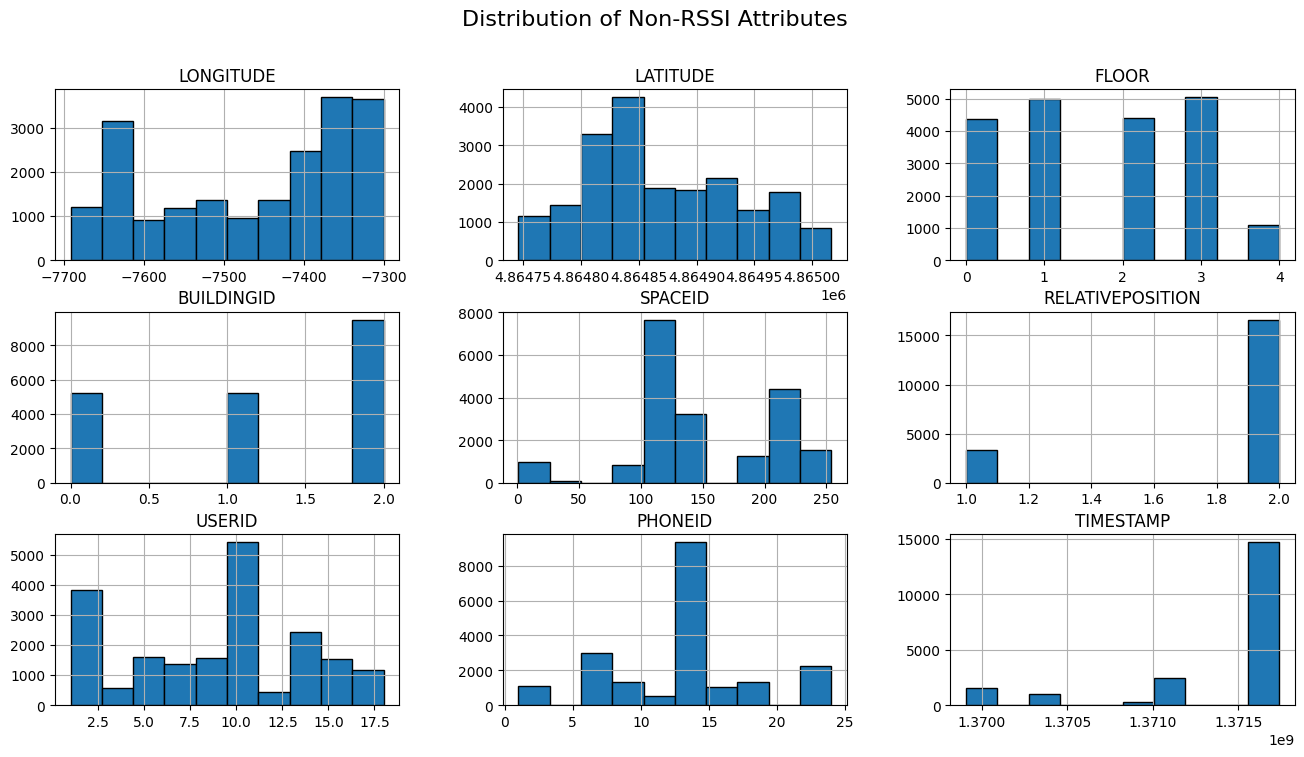

In [9]:
# Histograms for each Non-RSSI attribute
df[other_columns].hist(figsize=(16, 8), edgecolor='black')
plt.suptitle("Distribution of Non-RSSI Attributes", fontsize=16)
plt.show()


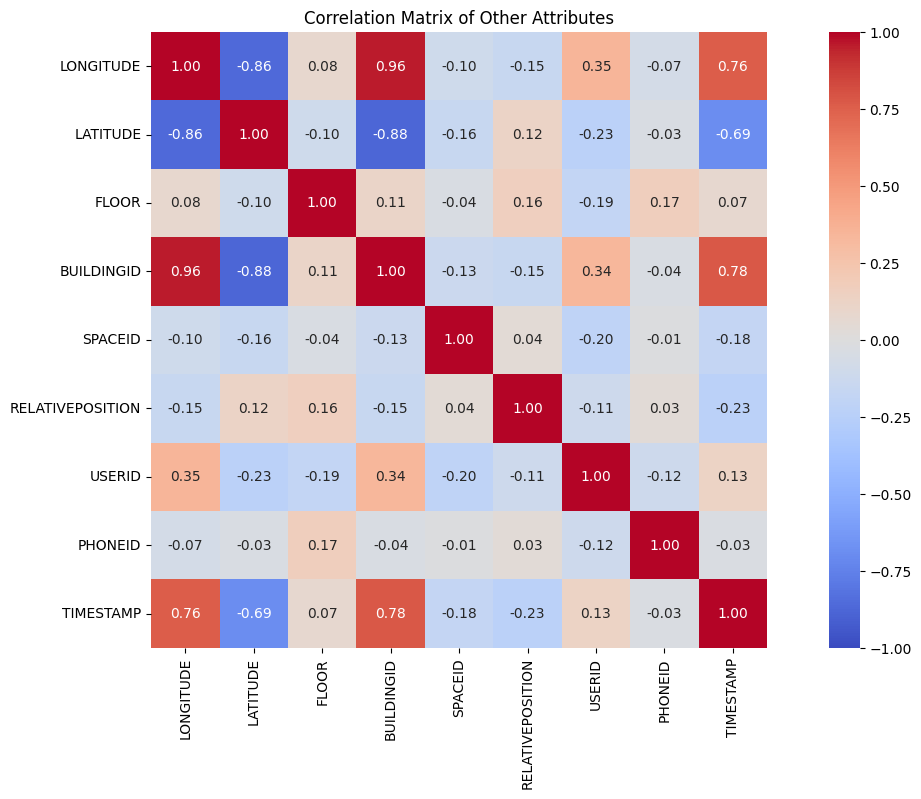

In [10]:
# Correlation matrix 
plt.figure(figsize=(16, 8))
sns.heatmap(df[other_columns].corr(), cmap="coolwarm", annot=True, fmt=".2f", center=0, vmax= 1, vmin=-1, square=True)
plt.title("Correlation Matrix of Other Attributes")
plt.show()


In [11]:
# # Pairplot for FLOOR 
# pairplot1 = sns.pairplot(df[other_columns], hue="FLOOR")
# pairplot1.fig.suptitle("Pairplot of Other Attributes (Colored by FLOOR)")

# # Pairplot for BUILDINGID
# pairplot2 = sns.pairplot(df[other_columns], hue="BUILDINGID")
# pairplot2.fig.suptitle("Pairplot of Other Attributes (Colored by BUILDINGID)")

# plt.show()


### Floor and Buildings

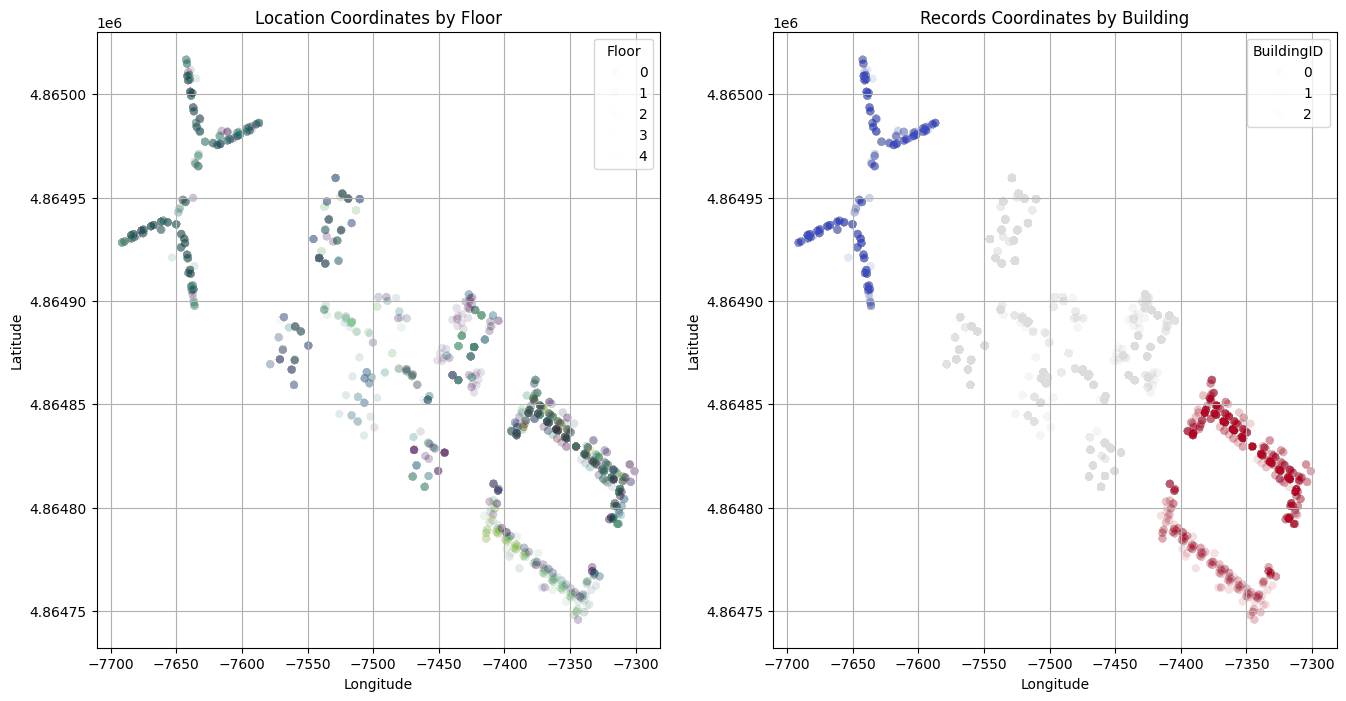

In [12]:
# Scatter plot of Longitude vs Latitude colored by Floor and By building
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.scatterplot(x=df["LONGITUDE"], y=df["LATITUDE"], hue=df["FLOOR"], alpha=0.01, palette="viridis")
plt.title("Location Coordinates by Floor")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Floor")
plt.grid()

plt.subplot(1,2,2)
sns.scatterplot(x=df["LONGITUDE"], y=df["LATITUDE"], hue=df["BUILDINGID"], alpha=0.01, palette="coolwarm")
plt.title("Records Coordinates by Building")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="BuildingID")
plt.grid()
plt.show()

In [13]:
unique_floors = sorted(df['FLOOR'].unique())
unique_buildings = sorted(df['BUILDINGID'].unique())

print("unique_floors:", unique_floors)
print("unique_buildings:", unique_buildings)

unique_floors: [0, 1, 2, 3, 4]
unique_buildings: [0, 1, 2]


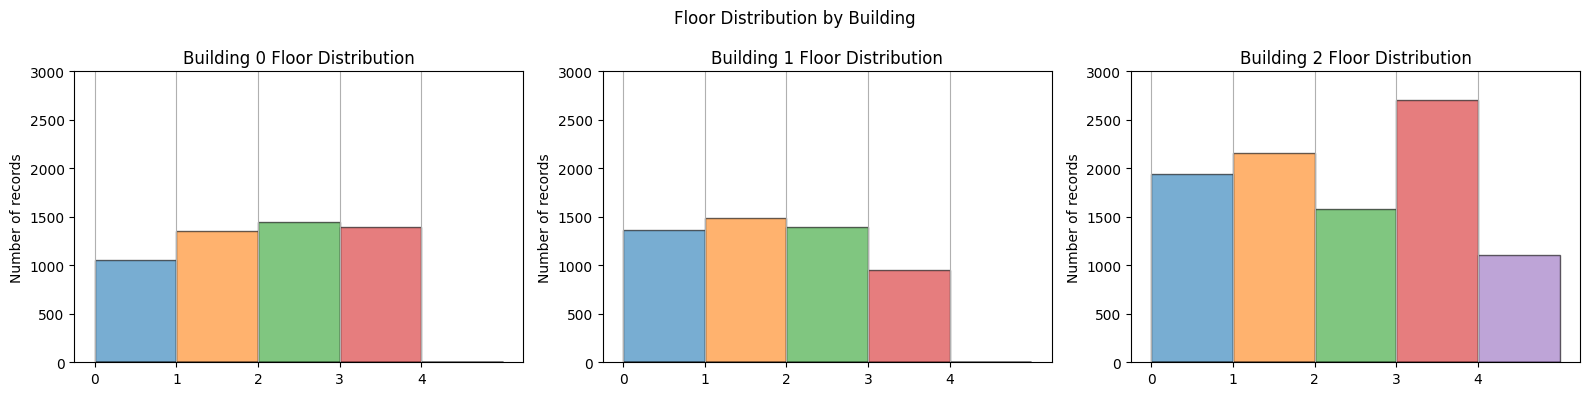

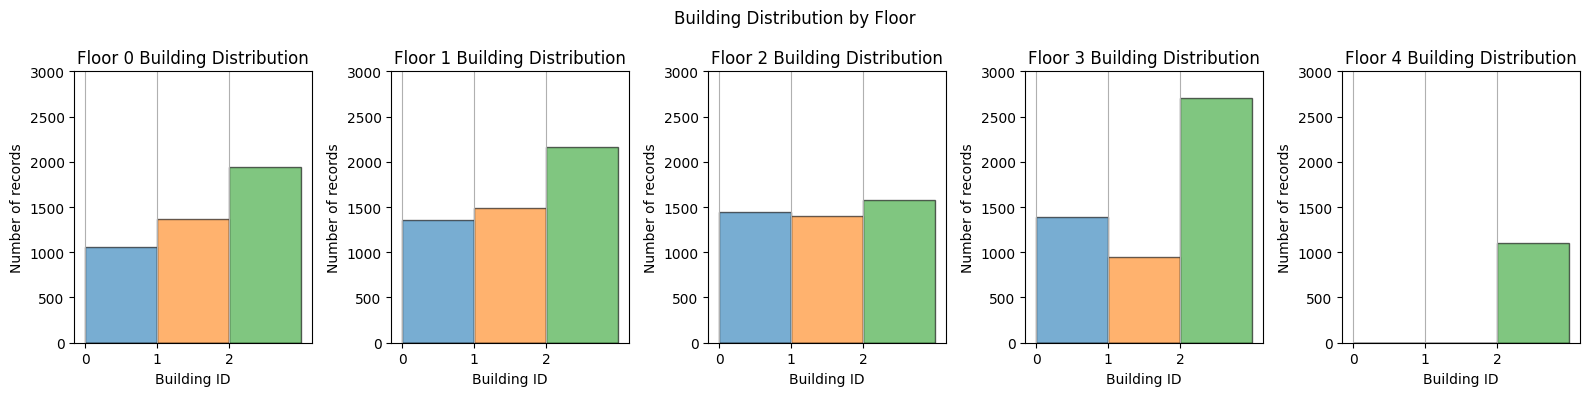

In [14]:
# Floor Distribution by Building
plt.figure(figsize=(16, 4))

for building in unique_buildings:
    plt.subplot(1, len(unique_buildings), building+1)  # Subplot per building
    for floor in unique_floors:
        df[(df["BUILDINGID"] == building) & (df["FLOOR"] == floor)]["FLOOR"].hist(
            alpha=0.6, bins=range(df["FLOOR"].min(), df["FLOOR"].max() + 2),
            edgecolor='black', label=f'Floor {floor}'
        )
    plt.title(f"Building {building} Floor Distribution")
    plt.ylabel("Number of records")
    plt.ylim(top=3000)
    plt.xticks(unique_floors)
    plt.grid(axis='y')

plt.suptitle("Floor Distribution by Building")
plt.tight_layout()
plt.show()

# Building Distribution by Floor
plt.figure(figsize=(16, 4))

for floor in unique_floors:
    plt.subplot(1, len(unique_floors), floor+1)  # Subplot per floor
    for building in unique_buildings:
        df[(df["FLOOR"] == floor) & (df["BUILDINGID"] == building)]["BUILDINGID"].hist(
            alpha=0.6, bins=range(df["BUILDINGID"].min(), df["BUILDINGID"].max() + 2),
            edgecolor='black', label=f'Building {building}'
        )
    plt.title(f"Floor {floor} Building Distribution")
    plt.xlabel("Building ID")
    plt.ylabel("Number of records")
    plt.ylim(top=3000)
    plt.xticks(unique_buildings)
    plt.grid(axis='y')

plt.suptitle("Building Distribution by Floor")
plt.tight_layout()
plt.show()


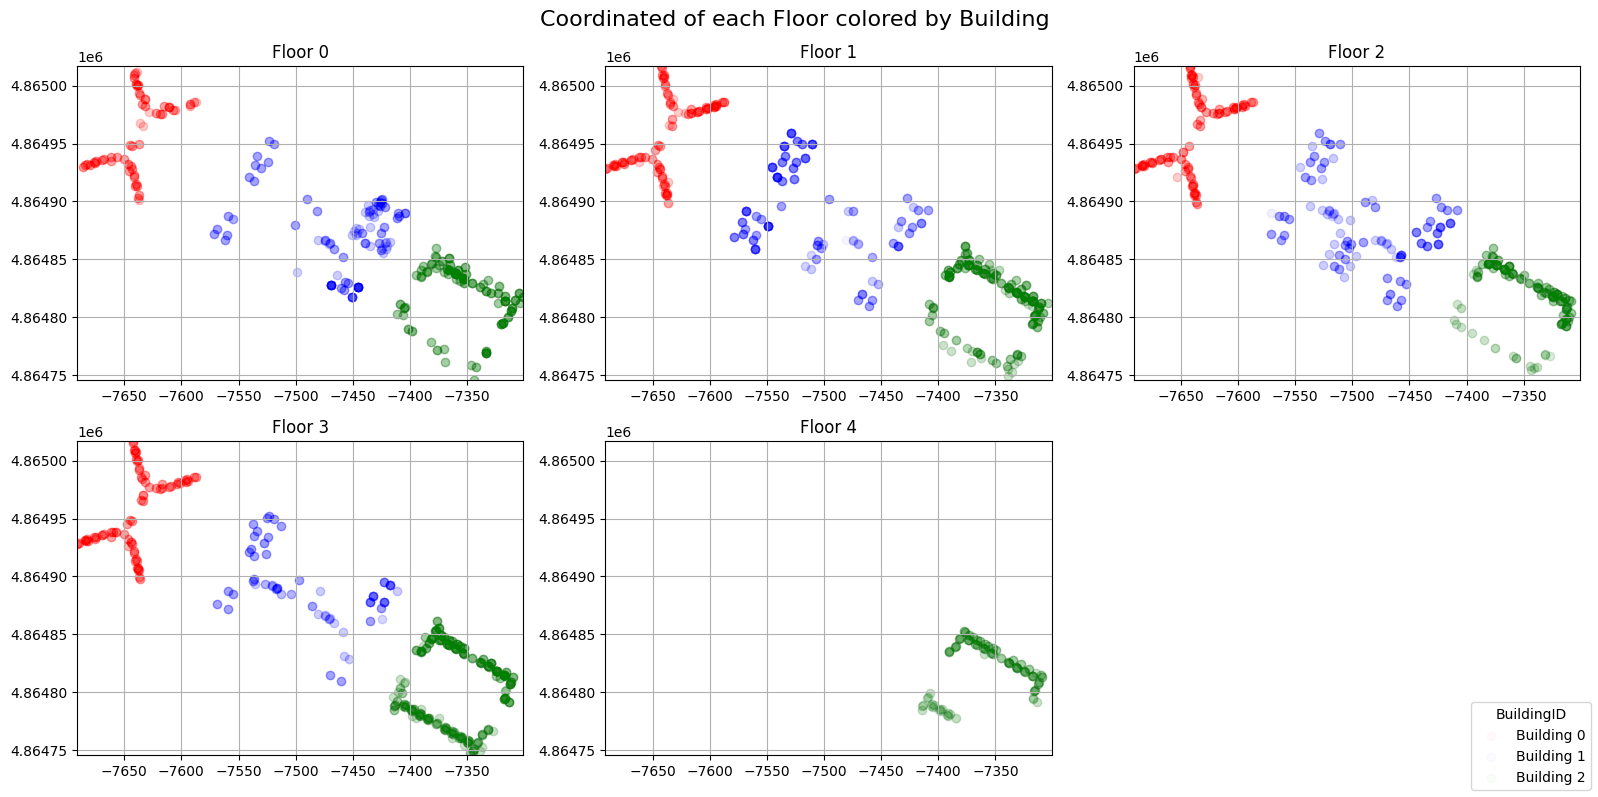

In [15]:
# Get consistent axis limits
x_min, x_max = df['LONGITUDE'].min(), df['LONGITUDE'].max()
y_min, y_max = df['LATITUDE'].min(), df['LATITUDE'].max()

# Define unique buildings and their corresponding colors
unique_buildings = sorted(df['BUILDINGID'].unique())
building_colors = {0: "red", 1: "blue", 2: "green"}

fig = plt.figure(figsize=(16, 8))
for floor in unique_floors:
    plt.subplot(2, 3, floor + 1)  # 2 rows, 3 columns, current plot index
    floor_data = df[df['FLOOR'] == floor]

    for building in unique_buildings:
        # Scatter plot with specific building color
        building_data = floor_data[floor_data['BUILDINGID'] == building]  

        plt.scatter(
            building_data['LONGITUDE'], building_data['LATITUDE'], 
            color=building_colors[building], alpha=0.02, label=f'Building {building}'
        )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.title(f'Floor {floor}')
    # plt.xlabel('Longitude')
    # plt.ylabel('Latitude')
    plt.grid(True)

# Create a legend for buildings
labels = [f'Building {building}' for building in unique_buildings]
fig.legend(labels, loc='lower right', title='BuildingID')

# Adjust layout for better visualization
plt.suptitle('Coordinated of each Floor colored by Building', fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
# Joy: ====================================================================================
# Now I have an overview of how the buildings and floor look like
# =========================================================================================

### WAP columns

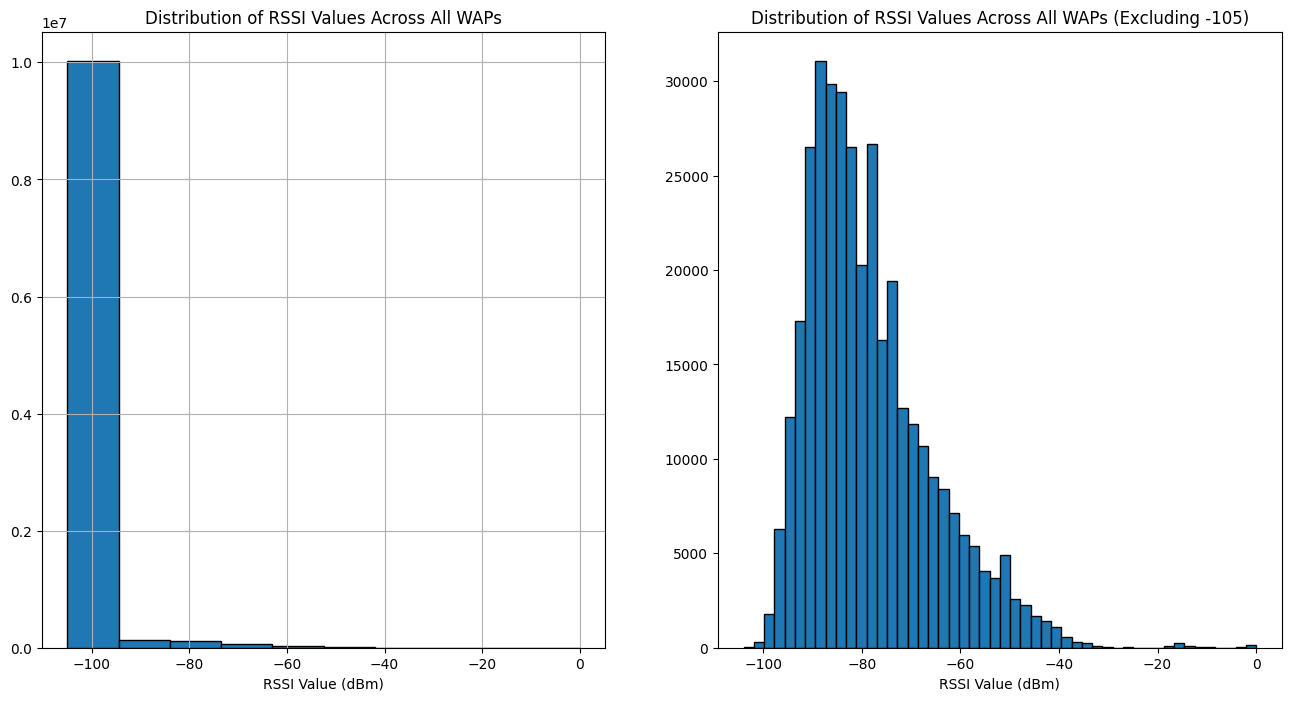

In [17]:
# Histogram of RSSI values
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
df[RSSI_columns].stack().hist(edgecolor='black')
plt.title("Distribution of RSSI Values Across All WAPs")
plt.xlabel("RSSI Value (dBm)")

# Histogram of RSSI values (excluding no signals)
plt.subplot(1,2,2)
df[RSSI_columns][df[RSSI_columns] != -105].stack().hist(edgecolor='black', bins=50)
plt.title("Distribution of RSSI Values Across All WAPs (Excluding -105)")
plt.xlabel("RSSI Value (dBm)")
plt.grid()
plt.show()

In [18]:
# Joy: ====================================================================================
# I want to understand if the WAP columns are floor or building specific
# =========================================================================================

In [19]:
WAP_floor_not_detected = []
WAP_floors = {}  

for WAP in RSSI_columns:
    detected_floors = sorted(df[df[WAP] != -105]["FLOOR"].unique())
    if len(detected_floors)==0: WAP_floor_not_detected.append(WAP)
    print(f"{WAP} is detected on floors: {detected_floors}")
    WAP_floors[WAP] = len(detected_floors)

print("\nWAPs not detected on any floor:")
print(WAP_floor_not_detected)


WAP001 is detected on floors: [2, 3]
WAP002 is detected on floors: [2, 3]
WAP003 is detected on floors: []
WAP004 is detected on floors: []
WAP005 is detected on floors: [2, 3, 4]
WAP006 is detected on floors: [0, 1, 2, 3]
WAP007 is detected on floors: [0, 1, 2, 3]
WAP008 is detected on floors: [0, 1, 2, 3]
WAP009 is detected on floors: [0, 1, 2, 3]
WAP010 is detected on floors: [1, 2, 3]
WAP011 is detected on floors: [1, 2, 3, 4]
WAP012 is detected on floors: [1, 2, 3, 4]
WAP013 is detected on floors: [0, 1, 2, 3]
WAP014 is detected on floors: [0, 1, 2, 3]
WAP015 is detected on floors: [0, 1, 2, 3]
WAP016 is detected on floors: [0, 1, 2, 3]
WAP017 is detected on floors: [0, 1, 2, 3]
WAP018 is detected on floors: [0, 1, 2, 3]
WAP019 is detected on floors: [0, 1, 2, 3]
WAP020 is detected on floors: [0, 1, 2, 3]
WAP021 is detected on floors: [1, 2, 3]
WAP022 is detected on floors: [2, 3]
WAP023 is detected on floors: [0, 1, 2, 3]
WAP024 is detected on floors: [0, 1, 2, 3]
WAP025 is detec

In [20]:
# Joy: ====================================================================================
# WAPs are not floor specific. Some dont even show any floors
# =========================================================================================

In [21]:
WAP_building_not_detected = []  
WAP_buildings = {}

for WAP in RSSI_columns:
    detected_buildings = sorted(df[df[WAP] != -105]["BUILDINGID"].unique())
    if len(detected_buildings)==0: WAP_building_not_detected.append(WAP)
    print(f"{WAP} is detected in buildings: {detected_buildings}")
    WAP_buildings[WAP]= len(detected_buildings)

print("\nWAPs not detected in any building:")
print(WAP_building_not_detected)


WAP001 is detected in buildings: [0]
WAP002 is detected in buildings: [0]
WAP003 is detected in buildings: []
WAP004 is detected in buildings: []
WAP005 is detected in buildings: [2]
WAP006 is detected in buildings: [1, 2]
WAP007 is detected in buildings: [0]
WAP008 is detected in buildings: [0, 1]
WAP009 is detected in buildings: [0]
WAP010 is detected in buildings: [1]
WAP011 is detected in buildings: [1, 2]
WAP012 is detected in buildings: [1, 2]
WAP013 is detected in buildings: [0]
WAP014 is detected in buildings: [0]
WAP015 is detected in buildings: [1]
WAP016 is detected in buildings: [1]
WAP017 is detected in buildings: [0, 1]
WAP018 is detected in buildings: [0, 2]
WAP019 is detected in buildings: [0]
WAP020 is detected in buildings: [0]
WAP021 is detected in buildings: [1]
WAP022 is detected in buildings: [1]
WAP023 is detected in buildings: [0, 1]
WAP024 is detected in buildings: [0, 1]
WAP025 is detected in buildings: [0]
WAP026 is detected in buildings: [0]
WAP027 is detect

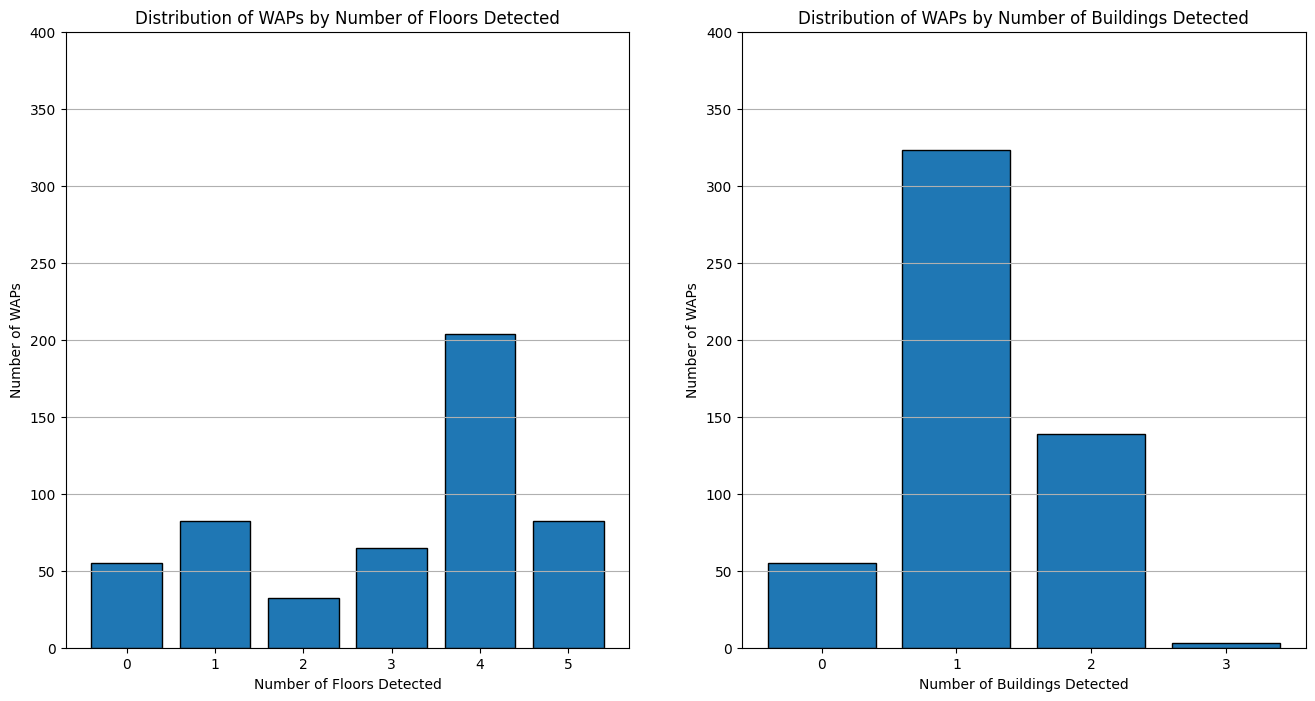

In [22]:
# Distribution of WAPs by Number of Floors Detected
floor_counts = {}
for wap, num_floors in WAP_floors.items():
    if num_floors not in floor_counts:
        floor_counts[num_floors] = 0
    floor_counts[num_floors] += 1

sorted_keys = sorted(floor_counts.keys())
sorted_values = [floor_counts[key] for key in sorted_keys]

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.bar(sorted_keys, sorted_values, edgecolor="black")
plt.xlabel("Number of Floors Detected")
plt.ylabel("Number of WAPs")
plt.ylim(top=400)
plt.title("Distribution of WAPs by Number of Floors Detected")
plt.xticks(sorted_keys)
plt.grid(axis="y")

# Distribution of WAPs by Number of Buildings Detected
building_counts = {}
for wap, num_buildings in WAP_buildings.items():
    if num_buildings not in building_counts:
        building_counts[num_buildings] = 0
    building_counts[num_buildings] += 1

sorted_keys = sorted(building_counts.keys())
sorted_values = [building_counts[key] for key in sorted_keys]

plt.subplot(1,2,2)
plt.bar(sorted_keys, sorted_values, edgecolor="black")
plt.xlabel("Number of Buildings Detected")
plt.ylabel("Number of WAPs")
plt.ylim(top=400)
plt.title("Distribution of WAPs by Number of Buildings Detected")
plt.xticks(sorted_keys)
plt.grid(axis="y")
plt.show()


In [23]:
# Joy: ====================================================================================
# WAPs are not building specific either. This is probably because the signal can travel far 
# in gaps or the area might be open. The list of WAP not detected might be the same as 
# we can remove those
# =========================================================================================

In [24]:
# Check if both lists contain the same WAPs
if set(WAP_building_not_detected) == set(WAP_floor_not_detected):
    print("Both `WAP_building_not_detected` and `WAP_floor_not_detected` are identical. The same WAPs are not detected in any building or floor.")
else:
    print("The lists are different. Some WAPs are missing in buildings but detected in floors, or vice versa.")

# Drop WAPs that are not detected in any building or floor
df.drop(columns=WAP_building_not_detected, inplace=True)
print(f"Dropped {len(WAP_building_not_detected)} WAP columns that were never detected.")
print("Reloading the new WAP column list...")
RSSI_columns = [col for col in df.columns if col.startswith("WAP")]

Both `WAP_building_not_detected` and `WAP_floor_not_detected` are identical. The same WAPs are not detected in any building or floor.
Dropped 55 WAP columns that were never detected.
Reloading the new WAP column list...


In [25]:
# Joy: ====================================================================================
# Yes, they are the same. I deleted them as they won't help with anything
# Now, I still want to know if the WAP values can help predict building and floor I'll 
# visualize a a few RSSI signal by floor and by building
# =========================================================================================

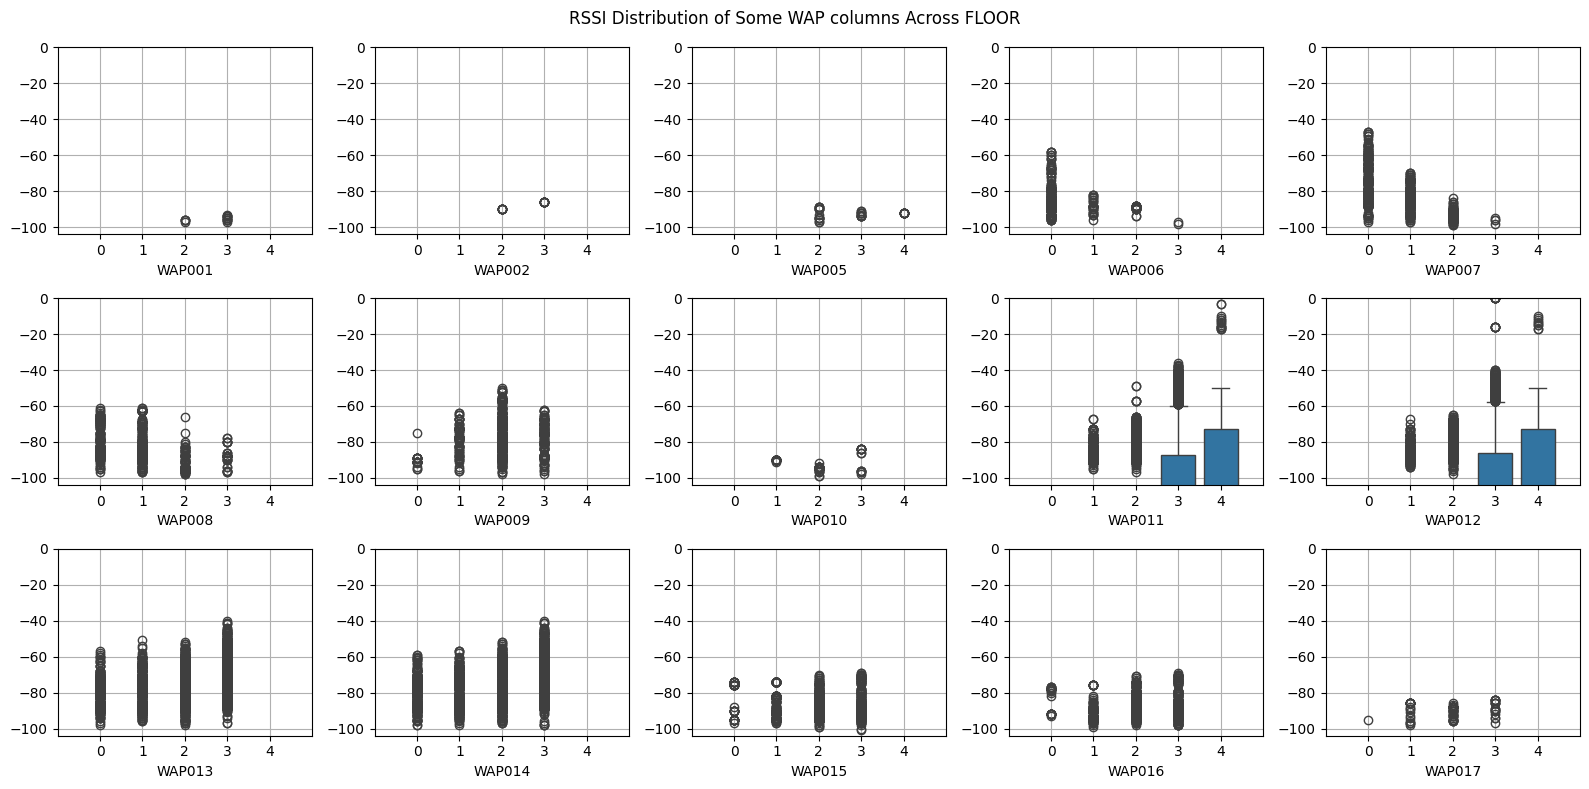

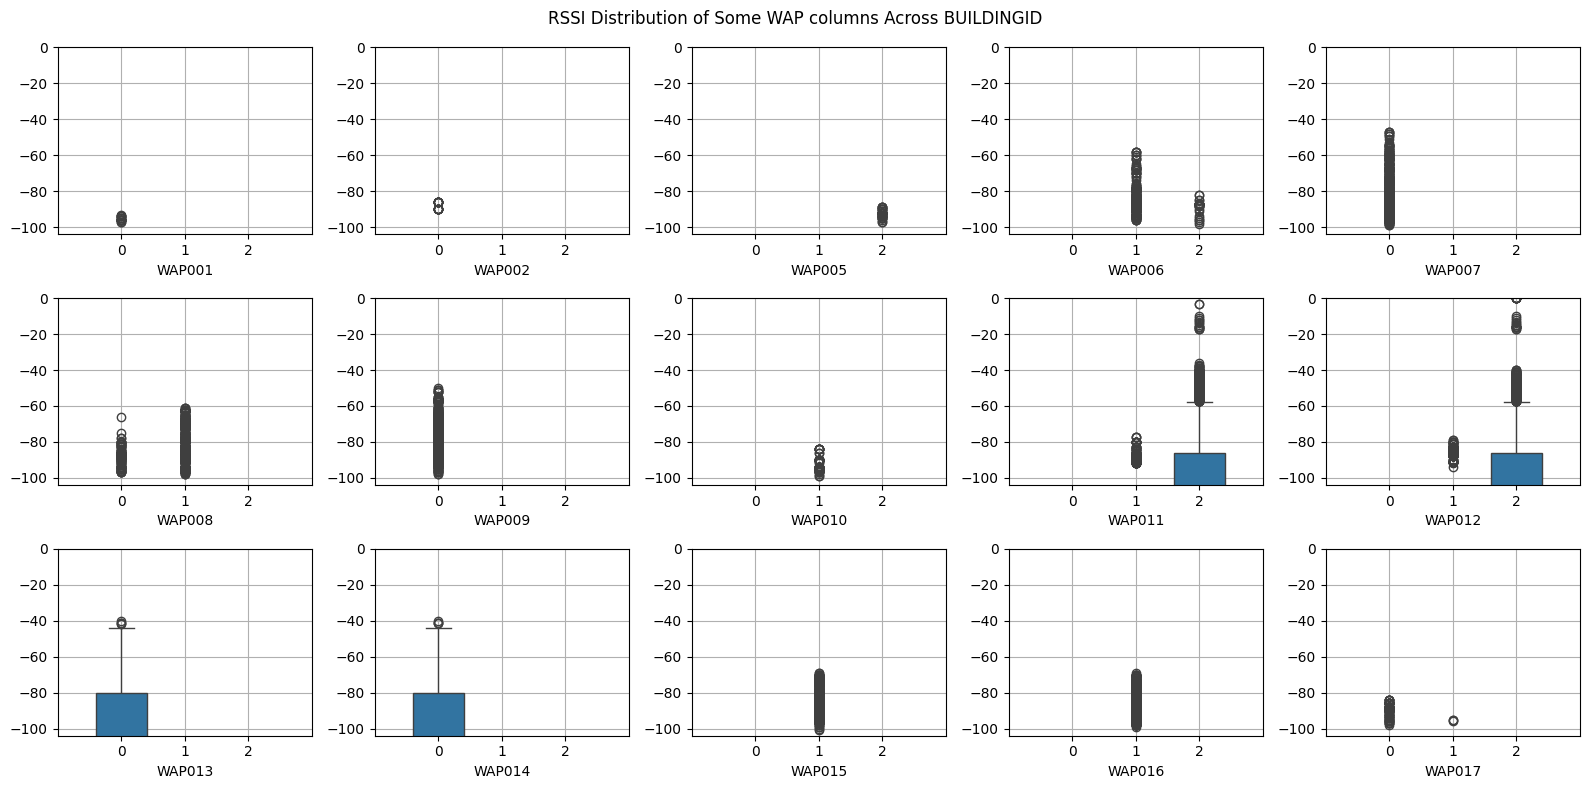

In [26]:
columns = 5
rows = 3

plt.figure(figsize=(16, 8))
for idx, wap_to_check in enumerate(RSSI_columns[:rows*columns], start=1):
    plt.subplot(rows, columns, idx)
    # Plot RSSI distribution across floors
    sns.boxplot(x=df["FLOOR"], y=df[wap_to_check])
    plt.xlabel(wap_to_check)
    plt.ylabel(None)
    plt.xlim(-1, 5)
    plt.ylim(-104, 0)
    plt.grid()
plt.suptitle(f"RSSI Distribution of Some WAP columns Across FLOOR")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
for idx, wap_to_check in enumerate(RSSI_columns[:rows*columns], start=1):
    plt.subplot(rows, columns, idx)
    # Plot RSSI distribution across floors
    sns.boxplot(x=df["BUILDINGID"], y=df[wap_to_check])
    plt.xlabel(wap_to_check)
    plt.ylabel(None)
    plt.xlim(-1, 3)
    plt.ylim(-104, 0)
    plt.grid()
plt.suptitle(f"RSSI Distribution of Some WAP columns Across BUILDINGID")
plt.tight_layout()
plt.show()


In [27]:
df.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [28]:
# for index, row in df.iterrows():
#     detected_waps = [WAP for WAP in RSSI_columns if row[WAP] != -105]
#     print(f"Record {index}: Detected WAPs → {detected_waps}")

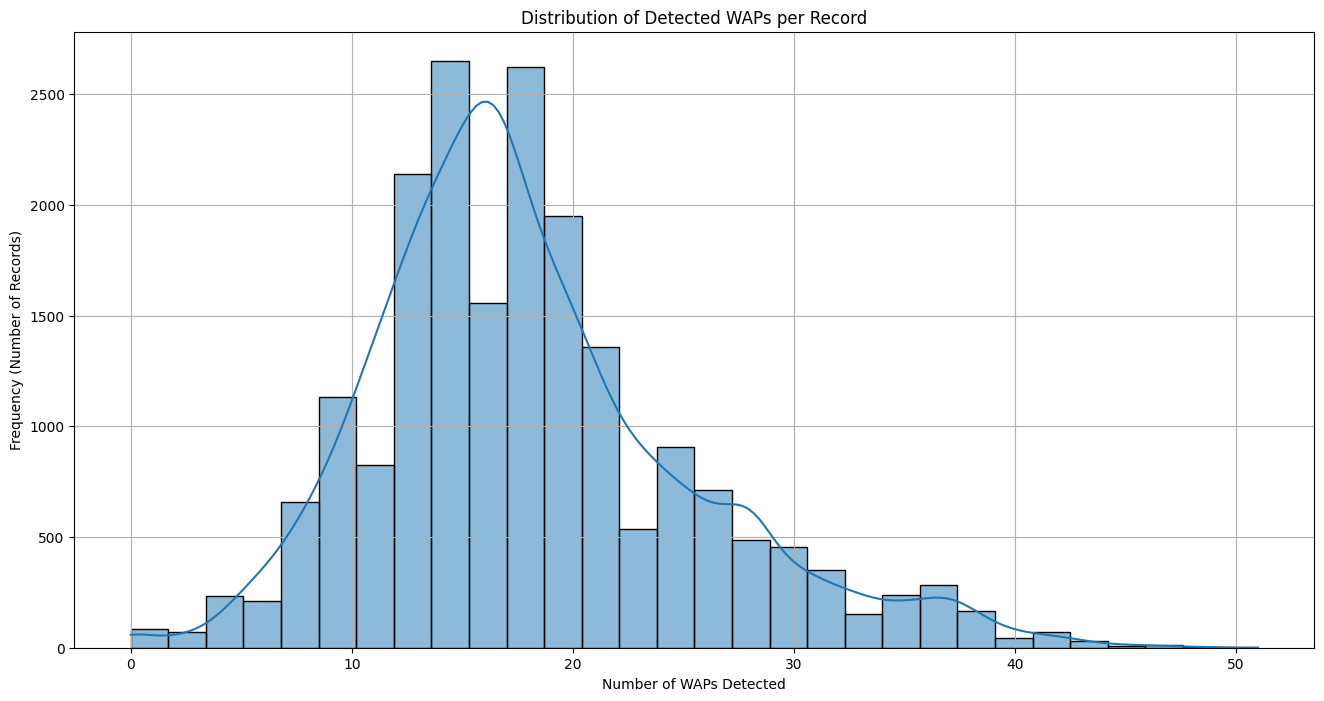

In [29]:
# Count detected WAPs per record
num_waps_detected = [len([WAP for WAP in RSSI_columns if row[WAP] != -105]) for _, row in df.iterrows()]

# Plot histogram
plt.figure(figsize=(16,8))
sns.histplot(num_waps_detected, bins=30, kde=True)
plt.xlabel("Number of WAPs Detected")
plt.ylabel("Frequency (Number of Records)")
plt.title("Distribution of Detected WAPs per Record")
plt.grid()
plt.show()


In [30]:
# # Get unique floors
# unique_floors = sorted(df["FLOOR"].unique())

# # Dictionary to store top WAPs per floor
# top_waps_per_floor = {}

# # Loop through each floor to find the most frequently detected WAPs
# for floor in unique_floors:
#     # Filter records for the specific floor
#     floor_df = df[df["FLOOR"] == floor]

#     # Count WAP appearances in the floor's records
#     wap_counts = Counter(WAP for _, row in floor_df.iterrows() for WAP in RSSI_columns if row[WAP] != -105)

#     # Get the top 10 most frequently detected WAPs
#     top_waps = sorted(wap_counts.items(), key=lambda x: x[1], reverse=True)[:25]
#     top_waps_per_floor[floor] = top_waps

# # Plot bar charts for each floor
# plt.figure(figsize=(16, 8))

# for idx, floor in enumerate(unique_floors, start=1):
#     plt.subplot(1, 5, idx)  # Create subplots
#     waps, counts = zip(*top_waps_per_floor[floor])
#     plt.bar(waps, counts, color="blue", alpha=0.7, edgecolor="black")
#     plt.xticks(rotation=90, fontsize=8)
#     plt.xlabel(f"floor {floor}")
#     # plt.ylabel("Number of Records Detected")
#     plt.grid(axis="y")

# plt.suptitle(f"Top 10 Most Frequent WAPs - Each Floor")
# plt.tight_layout()
# plt.show()


In [31]:
# Joy: ====================================================================================
# Each record receives at multiple signals access points too. I think we can feature
# engineer to map the max RSSI on a 
# =========================================================================================

In [32]:
# RSSI_multifloor = [] 
# for WAP in RSSI_columns:
#     max_value = df[WAP].max() 
#     max_floors = sorted(df[df[WAP] == max_value]["FLOOR"].unique())  

#     # If the WAP originally had high signals on multiple floors, add to list
#     if len(max_floors) > 1: RSSI_multifloor.append(WAP)
        
#     # If there are more than 1 floor for a max_value then check the next highest
#     while len(max_floors) > 1:
#         max_value = df[df[WAP] < max_value][WAP].max()  # Find the next highest RSSI
#         max_floors = sorted(df[df[WAP] == max_value]["FLOOR"].unique())  

#     print(f"{WAP} has max RSSI {max_value:>3} detected on floors: {max_floors}")
# print("RSSI_multifloor (WAPs that have high signals on multiple floors):", RSSI_multifloor)

# WAP_multibuilding = [] 
# for WAP in RSSI_columns:
#     max_value = df[WAP].max() 
#     max_buildings = sorted(df[df[WAP] == max_value]["BUILDINGID"].unique())  

#     # If the WAP originally had high signals on multiple buildings, add to list
#     if len(max_buildings) > 1: WAP_multibuilding.append(WAP)
        
#     # If there are more than 1 building for a max_value then check the next highest
#     while len(max_buildings) > 1:
#         max_value = df[df[WAP] < max_value][WAP].max()  # Find the next highest RSSI
#         max_buildings = sorted(df[df[WAP] == max_value]["BUILDINGID"].unique())  

#     print(f"{WAP} has max RSSI {max_value:>3} detected on buildings: {max_buildings}")
# print("WAP_multibuilding (WAPs that have high signals on multiple buildings):", RSSI_multifloor)



## Data Cleaning and Preparation

In [33]:
"""
Data Cleaning and Preparation:
    Handle any missing values and normalize the RSSI measurements.
    Scale features appropriately and encode any categorical variables if needed.
    Optionally, apply feature reduction techniques (e.g., PCA) to reduce noise and improve model efficiency.

"""

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df[other_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LONGITUDE         19937 non-null  float64
 1   LATITUDE          19937 non-null  float64
 2   FLOOR             19937 non-null  int64  
 3   BUILDINGID        19937 non-null  int64  
 4   SPACEID           19937 non-null  int64  
 5   RELATIVEPOSITION  19937 non-null  int64  
 6   USERID            19937 non-null  int64  
 7   PHONEID           19937 non-null  int64  
 8   TIMESTAMP         19937 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.4 MB


### Missing values

In [34]:
df.isna().sum().any()

False

In [35]:
# Joy: ====================================================================================
# There are no missing values and the not-detected WAP are already converted from 100 to -105 
# =========================================================================================

### Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[RSSI_columns] = scaler.fit_transform(df[RSSI_columns])

scaler_coords = MinMaxScaler(feature_range=(0, 1))
df[["LONGITUDE", "LATITUDE"]] = scaler_coords.fit_transform(df[["LONGITUDE", "LATITUDE"]])

In [37]:
# Joy: ====================================================================================
# Standard Scaling, MinMaxScaler does not assume a normal distribution and scaling the 
# coordinates will improve distance-based models like SVM, Neural Networks
# =========================================================================================

In [38]:
categorical_columns = ["BUILDINGID", "FLOOR"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)
building_columns = [col for col in df.columns if col.startswith("BUILDINGID")]
floor_columns = [col for col in df.columns if col.startswith("FLOOR")]

### PCA

In [39]:
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(df[RSSI_columns])

# Summary of data processing
num_original_features = len(RSSI_columns)
num_components = pca.n_components_
num_features_removed = num_original_features - num_components

print(f"Data Cleaning and Preparation Completed.")
print(f"PCA removed {num_features_removed} of the original {num_original_features} RSSI columns")


Data Cleaning and Preparation Completed.
PCA removed 298 of the original 465 RSSI columns


In [40]:
df_pca = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(num_components)])

# Add non-RSSI columns back if needed
df_pca["LONGITUDE"] = df["LONGITUDE"]
df_pca["LATITUDE"] = df["LATITUDE"]
df_pca[building_columns] = df[building_columns]
df_pca[floor_columns] = df[floor_columns]

df_pca.head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_166,PCA_167,LONGITUDE,LATITUDE,BUILDINGID_1,BUILDINGID_2,FLOOR_1,FLOOR_2,FLOOR_3,FLOOR_4
0,0.113872,0.025619,0.175059,0.696618,0.379238,-0.333301,1.272969,0.357313,0.051137,-0.399208,...,-0.003532,0.004523,0.384294,0.646015,1,0,0,1,0,0
1,0.107321,0.025230,0.160788,0.646997,0.353115,-0.295829,1.139038,0.315768,-0.028676,-0.290573,...,-0.016020,0.007954,0.396183,0.695646,1,0,0,1,0,0
2,0.038747,0.001399,0.177835,0.546049,0.191126,-0.327867,0.958327,0.238142,0.277187,-0.267378,...,-0.009463,0.014025,0.440915,0.752141,1,0,0,1,0,0
3,0.120268,0.026108,0.207935,0.693314,0.302354,-0.279097,1.204659,0.277865,0.225793,-0.549166,...,-0.017145,0.017909,0.427042,0.695158,1,0,0,1,0,0
4,0.052954,0.014135,0.043840,0.159255,0.024035,-0.022076,0.047522,-0.051472,-0.108323,0.017206,...,0.001996,-0.000548,0.151580,0.872775,0,0,0,0,0,0


In [41]:
# Joy: ====================================================================================
# For model testing we will preserve the real columns at first to see if we don't need to 
# apply PCA 
# =========================================================================================

### Making the data cleaning process reproducible

In [42]:
def load_and_clean_dataset(path):
    print(f"Loading {path} and applying the same preprocessing")
    df = pd.read_csv(path)

    print(">> The values in WAPxxx columns with 100 is turned into -105")
    RSSI_columns = [col for col in df.columns if col.startswith("WAP")]
    df[RSSI_columns] = df[RSSI_columns].replace(100, -105)

    print(f">> Dropped {len(WAP_building_not_detected)} WAP columns that were never detected.")
    df.drop(columns=WAP_building_not_detected, inplace=True)
    RSSI_columns = [col for col in df.columns if col.startswith("WAP")]

    print(">> Checking if there are any missing values:", df.isna().sum().any())

    print(">> Scaling the numerical columns (RSSI_columns and Coordinate Columns) with MinMaxScaler")
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[RSSI_columns] = scaler.fit_transform(df[RSSI_columns])
    scaler_coords = MinMaxScaler(feature_range=(0, 1))
    df[["LONGITUDE", "LATITUDE"]] = scaler_coords.fit_transform(df[["LONGITUDE", "LATITUDE"]])
    
    return df

# Model Development

In [55]:
# Joy: ====================================================================================
# Basic Model Classification: Develop a simple machine learning model (e.g., Decision Tree 
# or SVM) to predict the Building ID and Floor based on WiFi fingerprints.'

# Advanced Model Regression: Develop an advanced regression model (e.g., a neural network-
# based regressor) to enhance coordinate estimation
# =========================================================================================

In [56]:
# Asma: ====================================================================================
# Basic Model regression: Develop a simple machine learning model (e.g., linear regression)) to predict the exact coordinates.

# Advanced Model classification: Implement a deep learning model (e.g., a Convolutional Neural Network) to improve building and
#floor prediction accuracy.

# =========================================================================================

## Loading and re-cleaning data 

In [57]:
# Joy: ====================================================================================
# I've thought about whether to involve the validationData.csv in model development but I 
# decided to keep it untouched till the end therefore for the whole model# development will 
# only use the trainingData.csv and the validationData.csv will simulate using the developed 
# model in the real
# =========================================================================================

df = load_and_clean_dataset("./UJIndoorLoc/trainingData.csv")
df.head()

Loading ./UJIndoorLoc/trainingData.csv and applying the same preprocessing
>> The values in WAPxxx columns with 100 is turned into -105
>> Dropped 55 WAP columns that were never detected.
>> Checking if there are any missing values: False
>> Scaling the numerical columns (RSSI_columns and Coordinate Columns) with MinMaxScaler


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.384294,0.646015,2,1,106,2,2,23,1371713733
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.396183,0.695646,2,1,106,2,2,23,1371713691
2,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,...,0.0,0.440915,0.752141,2,1,103,2,2,23,1371714095
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.427042,0.695158,2,1,102,2,2,23,1371713807
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.151580,0.872775,0,0,122,2,11,13,1369909710


In [58]:
RSSI_columns = [col for col in df.columns if col.startswith("WAP")]
COORD_columns = ["LONGITUDE", "LATITUDE"]
FLOOR_BUILDING_columns = ["FLOOR", "BUILDINGID"]

print("RSSI_columns:", RSSI_columns)
print("COORD_columns:", COORD_columns)
print("FLOOR_BUILDING_columns:", FLOOR_BUILDING_columns)

RSSI_columns: ['WAP001', 'WAP002', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012', 'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018', 'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024', 'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030', 'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036', 'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042', 'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048', 'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054', 'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060', 'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066', 'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072', 'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078', 'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084', 'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP090', 'WAP091', 'WAP096', 'WAP097', 'WAP098', 'WAP099', 'WAP100', 'WAP101', 'WAP102', 'WAP103', 'WAP104', 'WAP1

## Basic Model Regression

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

def preprocess_data(df):
    """
    Preprocess the WiFi dataset for model training
    """
    # Extract feature columns
    RSSI_columns = [col for col in df.columns if col.startswith("WAP")]
    COORD_columns = ["LONGITUDE", "LATITUDE"]
    FLOOR_BUILDING_columns = ["FLOOR", "BUILDINGID"]
    
    print(f"Number of RSSI features: {len(RSSI_columns)}")
    
    # Replace missing values (marked as 100) with a very low value(-105)
    # as 100 usually indicates no signal in WiFi RSSI datasets
    X = df[RSSI_columns].replace(100, -110)
    
    # Normalize RSSI values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Prepare target variables
    y_coords = df[COORD_columns]
    
    # Encode floor and building IDs for classification
    label_encoder_floor = LabelEncoder()
    label_encoder_building = LabelEncoder()
    
    y_floor = label_encoder_floor.fit_transform(df["FLOOR"])
    y_building = label_encoder_building.fit_transform(df["BUILDINGID"])
    
    # Print class distribution
    print(f"Floor classes: {np.unique(y_floor, return_counts=True)}")
    print(f"Building classes: {np.unique(y_building, return_counts=True)}")
    
    # Split the data
    X_train, X_test, y_coords_train, y_coords_test, y_floor_train, y_floor_test, y_building_train, y_building_test = train_test_split(
        X_scaled, y_coords, y_floor, y_building, test_size=0.2, random_state=42
    )
    
    return {
        'X_train': X_train, 
        'X_test': X_test,
        'y_coords_train': y_coords_train, 
        'y_coords_test': y_coords_test,
        'y_floor_train': y_floor_train, 
        'y_floor_test': y_floor_test,
        'y_building_train': y_building_train, 
        'y_building_test': y_building_test,
        'floor_classes': len(np.unique(y_floor)),
        'building_classes': len(np.unique(y_building)),
        'rssi_columns': len(RSSI_columns),
        'scaler': scaler,
        'floor_encoder': label_encoder_floor,
        'building_encoder': label_encoder_building
    }


In [60]:
# Asma: ====================================================================================
# im trying to find the best Basic regression model,for now the linear regression did not perform very well 
# so im trying KNN and Decision Tree regression next to determine which one is the best

In [61]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
## 
def build_basic_regression_model(data):
    """
    Building and evaluating a basic regression model for coordinate prediction.
    """
    print("Building basic regression model for coordinate prediction...")
    
    # Standardization + Linear Regression (without complex tuning)
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Ridge(alpha=0.1))  # Light regularization for basic model
    ])
    
    # Train the model
    model.fit(data['X_train'], data['y_coords_train'])
    
    # Make predictions
    coords_pred = model.predict(data['X_test'])
    
    # Calculate RMSE
    mse_long = mean_squared_error(data['y_coords_test']['LONGITUDE'], coords_pred[:, 0])
    mse_lat = mean_squared_error(data['y_coords_test']['LATITUDE'], coords_pred[:, 1])
    rmse_long = np.sqrt(mse_long)
    rmse_lat = np.sqrt(mse_lat)
    overall_rmse = np.sqrt((mse_long + mse_lat) / 2)
    
    print(f"Longitude RMSE: {rmse_long:.4f}")
    print(f"Latitude RMSE: {rmse_lat:.4f}")
    print(f"Overall RMSE: {overall_rmse:.4f}")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(data['y_coords_test']['LONGITUDE'], coords_pred[:, 0], alpha=0.5)
    plt.plot([-180, 180], [-180, 180], 'r--')
    plt.xlabel('Actual Longitude')
    plt.ylabel('Predicted Longitude')
    plt.title('Longitude Prediction')
    
    plt.subplot(1, 2, 2)
    plt.scatter(data['y_coords_test']['LATITUDE'], coords_pred[:, 1], alpha=0.5)
    plt.plot([-90, 90], [-90, 90], 'r--')
    plt.xlabel('Actual Latitude')
    plt.ylabel('Predicted Latitude')
    plt.title('Latitude Prediction')
    
    plt.tight_layout()
    plt.show()
    
    return model


In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def build_knn_regression_model(data):
    """
    Building and evaluating a KNN regression model for coordinate prediction.
    """
    print("Building KNN regression model for coordinate prediction...")
    
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', KNeighborsRegressor(n_neighbors=5))
    ])
    
    model.fit(data['X_train'], data['y_coords_train'])
    coords_pred = model.predict(data['X_test'])
    
    mse_long = mean_squared_error(data['y_coords_test']['LONGITUDE'], coords_pred[:, 0])
    mse_lat = mean_squared_error(data['y_coords_test']['LATITUDE'], coords_pred[:, 1])
    rmse_long = np.sqrt(mse_long)
    rmse_lat = np.sqrt(mse_lat)
    overall_rmse = np.sqrt((mse_long + mse_lat) / 2)
    
    print(f"Longitude RMSE: {rmse_long:.4f}")
    print(f"Latitude RMSE: {rmse_lat:.4f}")
    print(f"Overall RMSE: {overall_rmse:.4f}")
    
    return model

def build_decision_tree_regression_model(data):
    """
    Building and evaluating a Decision Tree regression model for coordinate prediction.
    """
    print("Building Decision Tree regression model for coordinate prediction...")
    
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', DecisionTreeRegressor(max_depth=10))
    ])
    
    model.fit(data['X_train'], data['y_coords_train'])
    coords_pred = model.predict(data['X_test'])
    
    mse_long = mean_squared_error(data['y_coords_test']['LONGITUDE'], coords_pred[:, 0])
    mse_lat = mean_squared_error(data['y_coords_test']['LATITUDE'], coords_pred[:, 1])
    rmse_long = np.sqrt(mse_long)
    rmse_lat = np.sqrt(mse_lat)
    overall_rmse = np.sqrt((mse_long + mse_lat) / 2)
    
    print(f"Longitude RMSE: {rmse_long:.4f}")
    print(f"Latitude RMSE: {rmse_lat:.4f}")
    print(f"Overall RMSE: {overall_rmse:.4f}")
    
    return model


Number of RSSI features: 520
Floor classes: (array([0, 1, 2, 3, 4], dtype=int64), array([4369, 5002, 4416, 5048, 1102], dtype=int64))
Building classes: (array([0, 1, 2], dtype=int64), array([5249, 5196, 9492], dtype=int64))
Building Decision Tree regression model for coordinate prediction...
Longitude RMSE: 32.4105
Latitude RMSE: 22.1128
Overall RMSE: 27.7436
Building KNN regression model for coordinate prediction...
Longitude RMSE: 7.9451
Latitude RMSE: 5.9677
Overall RMSE: 7.0263
Building basic regression model for coordinate prediction...
Longitude RMSE: 27.4418
Latitude RMSE: 17.3907
Overall RMSE: 22.9727


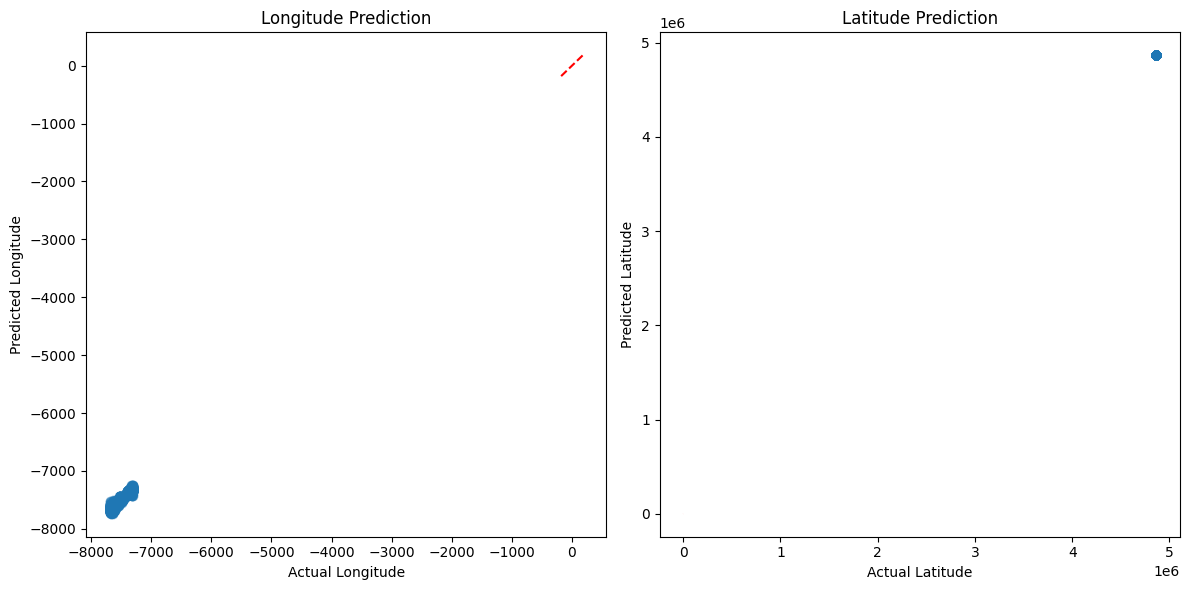

Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Ridge(alpha=0.1))])

In [63]:
df = pd.read_csv('./UJIndoorLoc/trainingData.csv')
data=preprocess_data(df)


build_decision_tree_regression_model(data)
build_knn_regression_model(data)
build_basic_regression_model(data)

In [64]:
# Asma: ====================================================================================
# after performing the three models we can say the KNN model is the best one ) to predict the exact coordinates.

In [65]:
# Set the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Custom dataset class for PyTorch
class WiFiDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.features)
        
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Define the neural network architecture for classification
class WiFiClassifierNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.3):
        super(WiFiClassifierNN, self).__init__()
        
        # Feature extraction layers
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            
            nn.Linear(hidden_size, hidden_size // 2),
            nn.BatchNorm1d(hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )
        
        # Classification head
        self.classifier = nn.Linear(hidden_size // 2, output_size)
        
    def forward(self, x):
        features = self.feature_extractor(x)
        return self.classifier(features)

def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

In [66]:
def build_pytorch_classification_models(data, batch_size=64, num_epochs=30, learning_rate=0.001):
    """
    Build and train PyTorch neural network models for floor and building classification
    """
    print("Building PyTorch neural network models for classification...")
    
    # Determine the device (CPU or GPU)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Create datasets and dataloaders
    train_floor_dataset = WiFiDataset(data['X_train'], data['y_floor_train'])
    test_floor_dataset = WiFiDataset(data['X_test'], data['y_floor_test'])
    
    train_building_dataset = WiFiDataset(data['X_train'], data['y_building_train'])
    test_building_dataset = WiFiDataset(data['X_test'], data['y_building_test'])
    
    train_floor_loader = DataLoader(train_floor_dataset, batch_size=batch_size, shuffle=True)
    test_floor_loader = DataLoader(test_floor_dataset, batch_size=batch_size)
    
    train_building_loader = DataLoader(train_building_dataset, batch_size=batch_size, shuffle=True)
    test_building_loader = DataLoader(test_building_dataset, batch_size=batch_size)
    
    # Create models
    floor_model = WiFiClassifierNN(
        input_size=data['rssi_columns'], 
        hidden_size=256, 
        output_size=data['floor_classes']
    ).to(device)
    
    building_model = WiFiClassifierNN(
        input_size=data['rssi_columns'], 
        hidden_size=256, 
        output_size=data['building_classes']
    ).to(device)
    
    # Loss function and optimizers
    criterion = nn.CrossEntropyLoss()
    floor_optimizer = optim.Adam(floor_model.parameters(), lr=learning_rate)
    building_optimizer = optim.Adam(building_model.parameters(), lr=learning_rate)
    
    # For early stopping
    best_floor_acc = 0.0
    best_building_acc = 0.0
    patience = 5
    floor_patience_counter = 0
    building_patience_counter = 0
    
    # Training history
    floor_train_loss_history = []
    floor_train_acc_history = []
    floor_val_loss_history = []
    floor_val_acc_history = []
    
    building_train_loss_history = []
    building_train_acc_history = []
    building_val_loss_history = []
    building_val_acc_history = []
    
    # Train floor model
    print("Training floor classifier...")
    for epoch in range(num_epochs):
        # Train
        train_loss, train_acc = train_epoch(
            floor_model, train_floor_loader, criterion, floor_optimizer, device
        )
        
        # Validate
        val_loss, val_acc = validate_epoch(
            floor_model, test_floor_loader, criterion, device
        )
        
        # Record history
        floor_train_loss_history.append(train_loss)
        floor_train_acc_history.append(train_acc)
        floor_val_loss_history.append(val_loss)
        floor_val_acc_history.append(val_acc)
        
        # Print progress
        print(f"Floor - Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        
        # Early stopping
        if val_acc > best_floor_acc:
            best_floor_acc = val_acc
            floor_patience_counter = 0
            # Save best model
            torch.save(floor_model.state_dict(), 'floor_model.pth')
        else:
            floor_patience_counter += 1
            if floor_patience_counter >= patience:
                print(f"Early stopping floor model at epoch {epoch+1}")
                break
    
    # Train building model
    print("\nTraining building classifier...")
    for epoch in range(num_epochs):
        # Train
        train_loss, train_acc = train_epoch(
            building_model, train_building_loader, criterion, building_optimizer, device
        )
        
        # Validate
        val_loss, val_acc = validate_epoch(
            building_model, test_building_loader, criterion, device
        )
        
        # Record history
        building_train_loss_history.append(train_loss)
        building_train_acc_history.append(train_acc)
        building_val_loss_history.append(val_loss)
        building_val_acc_history.append(val_acc)
        
        # Print progress
        print(f"Building - Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        
        # Early stopping
        if val_acc > best_building_acc:
            best_building_acc = val_acc
            building_patience_counter = 0
            # Save best model
            torch.save(building_model.state_dict(), 'building_model.pth')
        else:
            building_patience_counter += 1
            if building_patience_counter >= patience:
                print(f"Early stopping building model at epoch {epoch+1}")
                break
    
    # Load best models
    floor_model.load_state_dict(torch.load('floor_model.pth'))
    building_model.load_state_dict(torch.load('building_model.pth'))
    
    # Final evaluation
    floor_model.eval()
    building_model.eval()
    
    # Get predictions for test set
    floor_preds = []
    building_preds = []
    
    with torch.no_grad():
        for inputs, _ in test_floor_loader:
            inputs = inputs.to(device)
            outputs = floor_model(inputs)
            _, predicted = torch.max(outputs, 1)
            floor_preds.extend(predicted.cpu().numpy())
        
        for inputs, _ in test_building_loader:
            inputs = inputs.to(device)
            outputs = building_model(inputs)
            _, predicted = torch.max(outputs, 1)
            building_preds.extend(predicted.cpu().numpy())
    
    # Classification reports
    print("\nFloor Classification Report:")
    print(classification_report(data['y_floor_test'], floor_preds))
    
    print("\nBuilding Classification Report:")
    print(classification_report(data['y_building_test'], building_preds))
    
    # Visualize training history
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2, 2, 1)
    plt.plot(floor_train_acc_history, label='Train')
    plt.plot(floor_val_acc_history, label='Validation')
    plt.title('Floor Classification Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(floor_train_loss_history, label='Train')
    plt.plot(floor_val_loss_history, label='Validation')
    plt.title('Floor Classification Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(building_train_acc_history, label='Train')
    plt.plot(building_val_acc_history, label='Validation')
    plt.title('Building Classification Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.plot(building_train_loss_history, label='Train')
    plt.plot(building_val_loss_history, label='Validation')
    plt.title('Building Classification Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return floor_model, building_model

- WiFi access point columns (WAP001, WAP002, etc.)
- LONGITUDE, LATITUDE columns for coordinates
- FLOOR, BUILDINGID columns for classification targets
Number of RSSI features: 520
Floor classes: (array([0, 1, 2, 3, 4], dtype=int64), array([4369, 5002, 4416, 5048, 1102], dtype=int64))
Building classes: (array([0, 1, 2], dtype=int64), array([5249, 5196, 9492], dtype=int64))
Building PyTorch neural network models for classification...
Using device: cpu
Training floor classifier...
Floor - Epoch 1/30, Train Loss: 0.2873, Train Acc: 0.9204, Val Loss: 0.0441, Val Acc: 0.9887
Floor - Epoch 2/30, Train Loss: 0.0636, Train Acc: 0.9801, Val Loss: 0.0262, Val Acc: 0.9910
Floor - Epoch 3/30, Train Loss: 0.0451, Train Acc: 0.9853, Val Loss: 0.0239, Val Acc: 0.9900
Floor - Epoch 4/30, Train Loss: 0.0445, Train Acc: 0.9858, Val Loss: 0.0178, Val Acc: 0.9942
Floor - Epoch 5/30, Train Loss: 0.0311, Train Acc: 0.9903, Val Loss: 0.0197, Val Acc: 0.9932
Floor - Epoch 6/30, Train Loss: 0.0335, Train Acc: 

C:\Users\Joy Anne\AppData\Local\Temp\ipykernel_2212\1852743150.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  floor_model.load_state_dict(torch.load('floor_model.pth'

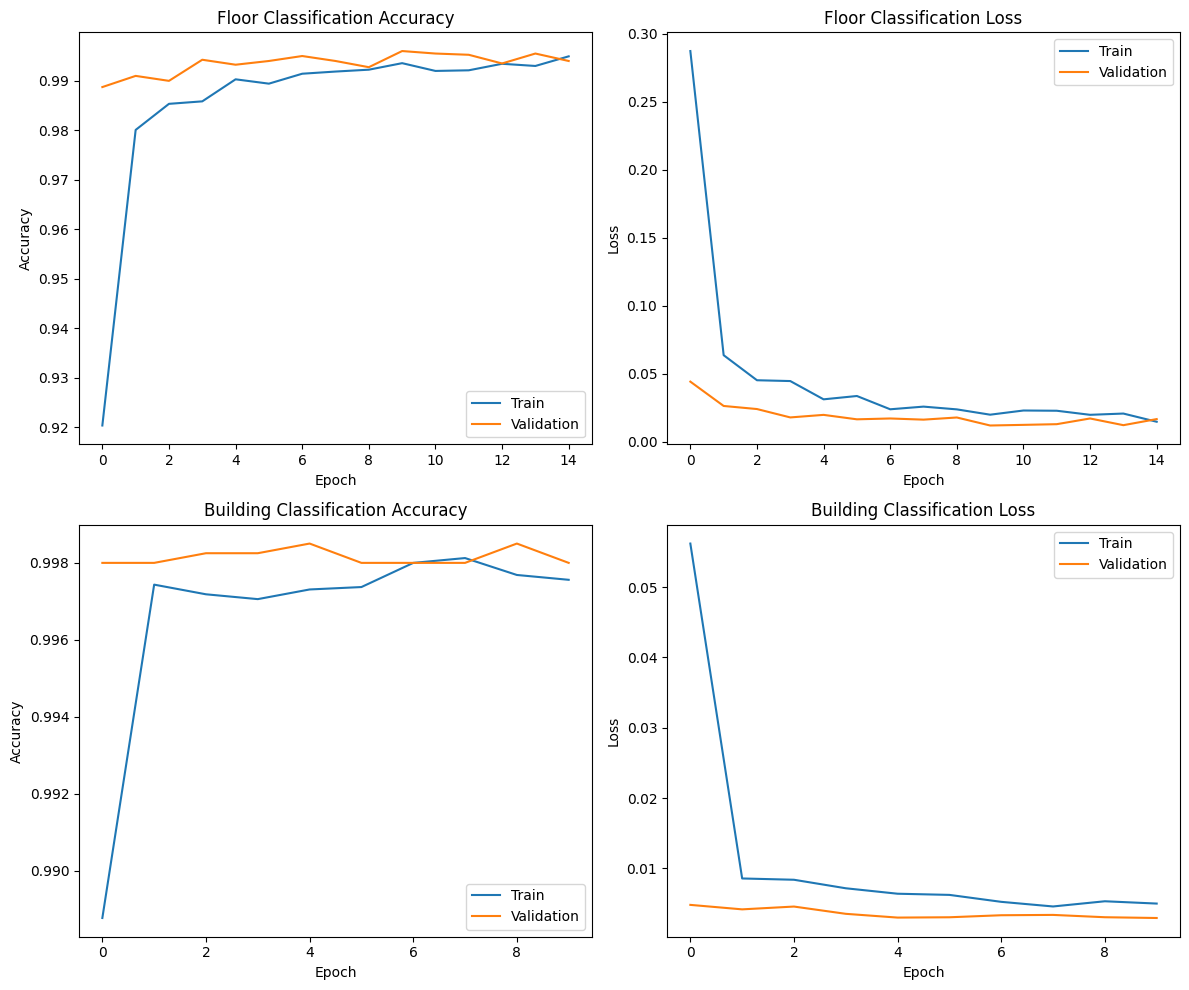

Model training and evaluation complete.


In [68]:
def main():
    df = pd.read_csv('./UJIndoorLoc/trainingData.csv')
    print("- WiFi access point columns (WAP001, WAP002, etc.)")
    print("- LONGITUDE, LATITUDE columns for coordinates")
    print("- FLOOR, BUILDINGID columns for classification targets")
    
    #Preprocess the data
    data = preprocess_data(df)
    
    # Build and evaluate the PyTorch neural network models (advanced)
    floor_model, building_model = build_pytorch_classification_models(data)
    
    print("Model training and evaluation complete.")
    

if __name__ == "__main__":
    main()

In [ ]:
# Asma: ====================================================================================
#The classification models for both floor and building ID show outstanding performance, 
#with near-perfect accuracy and F1-scores of 1.00, indicating that the models generalize well to unseen data. 
#The low validation loss and high validation accuracy suggest minimal overfitting.